## Pizza Sales Prediction

## Problem Statement
The Pizza Sales Analysis problem aims to extract valuable insights and predictive patterns from a comprehensive dataset capturing the sales dynamics of a pizzeria. The dataset contains detailed information on individual pizza orders, encompassing aspects such as pizza name, quantity, order date and time, unit price, total price, pizza size, category, ingredients, and more.

With this rich dataset at hand, the objective is to develop a data-driven machine learning model that can predict future pizza sales based on a combination of factors. These factors include the pizza's attributes such as size, category, and ingredients, as well as temporal variables like order date and time. By considering these variables collectively, the model should provide an accurate estimation of the sales figures for various pizzas over time.

By harnessing the power of machine learning and predictive analytics, this problem aspires to empower pizzeria owners and managers with actionable insights. The model's predictions can aid in optimizing inventory management, production planning, and marketing strategies. Furthermore, understanding the impact of different pizza attributes on sales can guide menu enhancements and special promotions, thereby driving customer satisfaction and boosting business revenue.


## Features
1)Pizza ID: This attribute serves as a unique identifier for each distinct pizza.

2)Order ID: This attribute functions as an identifier for individual pizza orders within the system.

3)Pizza Name ID: This attribute corresponds to the identifier associated with the specific name of a pizza.

4)Quantity: This attribute quantifies the number of pizzas included in an order.

5)Order Date: This attribute  the date on which a customer placed a pizza order.

6)Order Time: This attribute specifies the exact time when a customer's pizza order was placed.

7)Total Price: Representing the cumulative cost of the pizzas, this attribute is denominated in dollars. The dataset is derived from U.S. pizza sales data.

8)Unit Price: This attribute signifies the price of a single unit of pizza.

9)Pizza Size: Indicating the dimensional classification of the pizza, this attribute describes its size.

10)Pizza Category: Offering insight into the classification of the pizza, this attribute conveys its category.

11)Pizza Ingredients: This attribute lists the specific constituents utilized in the preparation of the pizza.

12)Pizza Name: This attribute articulates the unique name attributed to a specific pizza variant.

### Step-1 Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Step-2 Load the Dataset

In [2]:
df= pd.read_excel('pizza_sales_Dataset.xlsx')

In [3]:
df.head() ## Its shows the Top 5 records.

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1.0,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1.0,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1.0,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1.0,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1.0,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [4]:
df.shape ## Its gives the information about the rows and columns in dataset 

(48620, 12)

In [5]:
df.info() ## Its specifies Particular informtion about data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   pizza_id           48620 non-null  int64         
 1   order_id           48620 non-null  int64         
 2   pizza_name_id      48620 non-null  object        
 3   quantity           48507 non-null  float64       
 4   order_date         48620 non-null  datetime64[ns]
 5   order_time         48620 non-null  object        
 6   unit_price         48620 non-null  float64       
 7   total_price        48620 non-null  float64       
 8   pizza_size         48526 non-null  object        
 9   pizza_category     48553 non-null  object        
 10  pizza_ingredients  48620 non-null  object        
 11  pizza_name         48620 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(6)
memory usage: 4.5+ MB


### step-3 EDA (Exploratory Data Analysis)

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
pizza_id,48620.0,24310.500000,14035.529381,1.00,12155.75,24310.5,36465.25,48620.00
order_id,48620.0,10701.479761,6180.119770,1.00,5337.00,10682.5,16100.00,21350.00
quantity,48507.0,1.019667,0.143240,1.00,1.00,1.0,1.00,4.00
unit_price,48620.0,16.494132,3.621789,9.75,12.75,16.5,20.25,35.95
total_price,48620.0,16.821474,4.437398,9.75,12.75,16.5,20.50,83.00


In [7]:
df.isnull().sum()

pizza_id               0
order_id               0
pizza_name_id          0
quantity             113
order_date             0
order_time             0
unit_price             0
total_price            0
pizza_size            94
pizza_category        67
pizza_ingredients      0
pizza_name             0
dtype: int64

### Treating Null values

In this dataset, we have 3 variables that are treated with some filling method for null values. Since these 3 variables are object values, we can fill them with the mode option.

Here are some extra points about filling null values with the mode option:

The mode is the most frequent value in a column.
Filling null values with the mode is a good option when the data is categorical.
This is because the mode is the most likely value for a missing value in a categorical column.

In [8]:
df['quantity'].value_counts()

1.0    47580
2.0      903
3.0       21
4.0        3
Name: quantity, dtype: int64

In [9]:
quantity_mode=df['quantity'].mode()
quantity_mode

0    1.0
Name: quantity, dtype: float64

In [10]:
df['quantity']=df['quantity'].fillna(1.0)

In [11]:
df['pizza_size'].value_counts()

L      18432
M      15385
S      14137
XL       544
XXL       28
Name: pizza_size, dtype: int64

In [12]:
pizza_size_mode=df['pizza_size'].mode()
pizza_size_mode

0    L
Name: pizza_size, dtype: object

In [13]:
df['pizza_size']=df['pizza_size'].fillna("L")

In [14]:
df['pizza_category'].value_counts()

Classic    14512
Supreme    11777
Veggie     11449
Chicken    10815
Name: pizza_category, dtype: int64

In [15]:
pizza_category_mode=df['pizza_category'].mode()
pizza_category_mode

0    Classic
Name: pizza_category, dtype: object

In [16]:
df['pizza_category']=df['pizza_category'].fillna("Classic")

In [17]:
df.isnull().sum()

pizza_id             0
order_id             0
pizza_name_id        0
quantity             0
order_date           0
order_time           0
unit_price           0
total_price          0
pizza_size           0
pizza_category       0
pizza_ingredients    0
pizza_name           0
dtype: int64

### Checking for correlation

In [18]:
correlation=df.corr()
correlation

,pizza_id,order_id,quantity,unit_price,total_price
pizza_id,1.000000,0.999990,0.003639,-0.003286,-0.000847
order_id,0.999990,1.000000,0.003621,-0.003323,-0.000889
quantity,0.003639,0.003621,1.000000,0.007142,0.541926
unit_price,-0.003286,-0.003323,0.007142,1.000000,0.836087
total_price,-0.000847,-0.000889,0.541926,0.836087,1.000000


<AxesSubplot:>

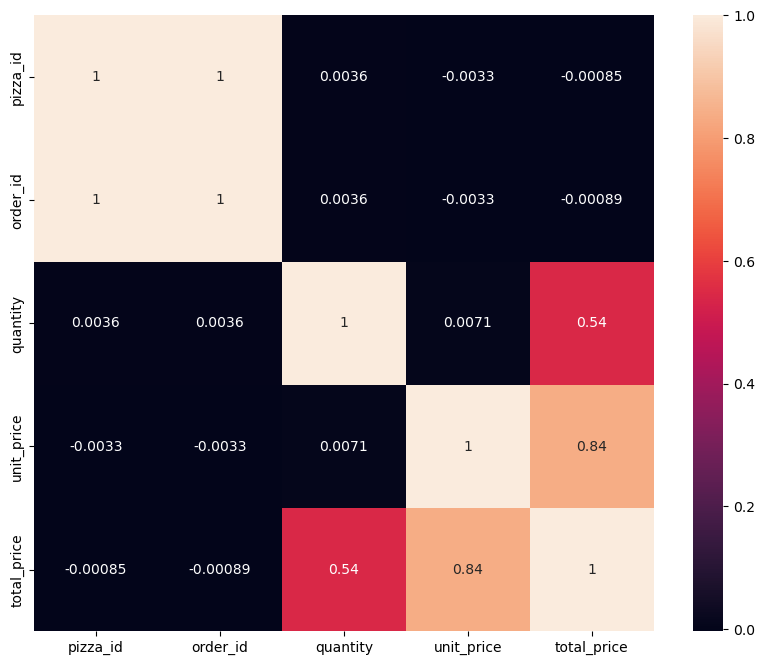

In [19]:
plt.figure(figsize=(10,8))
sns.heatmap(correlation,annot=True)

To enhance the model's performance, it's advisable to address the strong correlation between order_id and pizza_id. Consequently, one of these columns should be dropped. Additionally, there is a similar situation with unit_price and total_price, where one of these should be omitted.

In [20]:
df.drop(['order_id','unit_price'],inplace=True,axis=1)

Since the dataset includes columns containing date and time information, it is necessary to perform conversions for these specific columns.

In [21]:
df["order_month"] = df["order_date"].dt.month
df["order_day"] = df["order_date"].dt.day
df["order_year"] = df["order_date"].dt.year

In [22]:
df.head()

,pizza_id,pizza_name_id,quantity,order_date,order_time,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,order_month,order_day,order_year
0,1,hawaiian_m,1.0,2015-01-01,11:38:36,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,1,1,2015
1,2,classic_dlx_m,1.0,2015-01-01,11:57:40,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,1,1,2015
2,3,five_cheese_l,1.0,2015-01-01,11:57:40,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza,1,1,2015
3,4,ital_supr_l,1.0,2015-01-01,11:57:40,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza,1,1,2015
4,5,mexicana_m,1.0,2015-01-01,11:57:40,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,1,1,2015


In [23]:
from datetime import datetime

# Assuming df["order_time"] contains time strings in the format "HH:MM:SS"
df["order_time_seconds"] = df["order_time"].apply(
    lambda x: (datetime.strptime(str(x), "%H:%M:%S") - datetime.strptime("00:00:00", "%H:%M:%S")).seconds)

In [24]:
df.drop(['order_date','order_time'],axis=1,inplace=True)

In [25]:
df.head()

,pizza_id,pizza_name_id,quantity,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,order_month,order_day,order_year,order_time_seconds
0,1,hawaiian_m,1.0,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,1,1,2015,41916
1,2,classic_dlx_m,1.0,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,1,1,2015,43060
2,3,five_cheese_l,1.0,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza,1,1,2015,43060
3,4,ital_supr_l,1.0,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza,1,1,2015,43060
4,5,mexicana_m,1.0,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,1,1,2015,43060


I have performed Exploratory Data Analysis (EDA) on the dataset and created a Power BI dashboard to visualize the insights derived from the data. Additionally, I have conducted an in-depth analysis of pizza sales, uncovering valuable patterns and trends. The Power BI dashboard provides a comprehensive view of the data, offering actionable insights that contribute to a better understanding of both the dataset and the pizza sales dynamics.

### Outlier Treatment

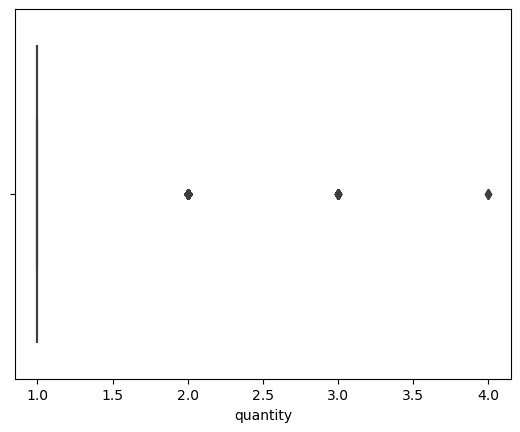

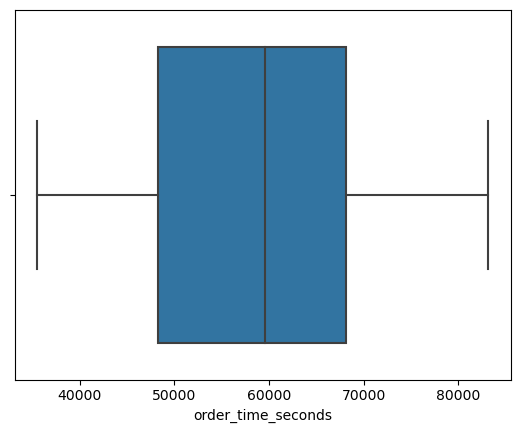

In [26]:
column_names = ['quantity','order_time_seconds']
for i in column_names:
    sns.boxplot(df[i],data=df);
    plt.show();

In the given dataset, comprising three numerical attributes, one of which serves as the target variable, the "quantity" feature exhibits outlier values. Consequently, outlier mitigation techniques are not employed within this dataset preprocessing. However, for subsequent stages, we employ the Min-Max scaling algorithm to normalize the numerical features. Notably, despite the presence of outliers and the utilization of Min-Max scaling, the predictive performance of the machine learning model remains unaltered.

### Label Encoding

In [27]:
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
LE=LabelEncoder()

In this dataset, there are four columns that need label encoding as they contain categorical data representing rankings. Since these four columns are of object data type, I will perform label encoding to convert these categorical variables into numerical values.

In [28]:
df['pizza_category']=LE.fit_transform(df['pizza_category'])
df['pizza_ingredients']=LE.fit_transform(df['pizza_ingredients'])
df['pizza_name_id']=LE.fit_transform(df['pizza_name_id'])
df['pizza_name']=LE.fit_transform(df['pizza_name'])

## One hot encoding

I have applied one-hot encoding to the 'pizza_size' column. This transformation was done because 'pizza_size' contains categorical data, and one-hot encoding converts each categorical value into a separate binary column, making it suitable for machine learning algorithms

In [29]:
df['pizza_size'].unique()

array(['M', 'L', 'S', 'XL', 'XXL'], dtype=object)

In [30]:
df=pd.get_dummies(df,columns=['pizza_size'],drop_first=True)

In [31]:
min_max=MinMaxScaler()
min_max

MinMaxScaler()

In [32]:
df['order_time_seconds']=min_max.fit_transform(df[['order_time_seconds']])
df['quantity']=min_max.fit_transform(df[['quantity']])

## Model Building

In [33]:
x=df.drop(['total_price'],axis=1)
y=df[['total_price']]

In [34]:
x.head()

,pizza_id,pizza_name_id,quantity,pizza_category,pizza_ingredients,pizza_name,order_month,order_day,order_year,order_time_seconds,pizza_size_M,pizza_size_S,pizza_size_XL,pizza_size_XXL
0,1,27,0.0,1,23,12,1,1,2015,0.133898,1,0,0,0
1,2,18,0.0,1,20,7,1,1,2015,0.157926,1,0,0,0
2,3,20,0.0,3,17,8,1,1,2015,0.157926,0,0,0,0
3,4,32,0.0,2,4,14,1,1,2015,0.157926,0,0,0,0
4,5,42,0.0,3,31,17,1,1,2015,0.157926,1,0,0,0


In [35]:
y.head()

,total_price
0,13.25
1,16.00
2,18.50
3,20.75
4,16.00


In [36]:
from sklearn.model_selection import train_test_split

In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)

In [38]:
x_train.shape

(34034, 14)

In [39]:
y_train.shape

(34034, 1)

In [40]:
x_test.shape

(14586, 14)

In [41]:
y_test.shape

(14586, 1)

## Linear Regression

In [42]:
from sklearn.linear_model import LinearRegression

In [43]:
regression_model=LinearRegression()

In [44]:
regression_model.fit(x_train,y_train)

LinearRegression()

In [45]:
regression_model.coef_[0]

array([ 1.99234455e-05,  1.46009954e-02,  4.96236569e+01,  2.27717039e-01,
       -7.34708655e-02, -3.04593191e-02, -7.93279601e-02, -1.32445580e-03,
        6.21724894e-15,  1.77939172e-02, -3.94199072e+00, -7.62498548e+00,
        5.02115963e+00,  1.53363671e+01])

In [46]:
for idx,col_name in enumerate(x_train.columns):
    print('The coeff for {} is {}'.format(col_name,regression_model.coef_[0][idx]))

The coeff for pizza_id is 1.9923445520871618e-05
The coeff for pizza_name_id is 0.014600995442313205
The coeff for quantity is 49.62365691415167
The coeff for pizza_category is 0.22771703871345778
The coeff for pizza_ingredients is -0.07347086548596185
The coeff for pizza_name is -0.03045931908632823
The coeff for order_month is -0.07932796013330093
The coeff for order_day is -0.001324455796307947
The coeff for order_year is 6.217248937900877e-15
The coeff for order_time_seconds is 0.017793917186757508
The coeff for pizza_size_M is -3.941990716063762
The coeff for pizza_size_S is -7.624985484506947
The coeff for pizza_size_XL is 5.021159632375265
The coeff for pizza_size_XXL is 15.336367055489863


In [47]:
intercept=regression_model.intercept_[0]
intercept

20.560118572882665

In [48]:
# R Square on the train the data
regression_model.score(x_train,y_train)

0.8587779807238929

In [49]:
# R Square on the test the data
regression_model.score(x_test,y_test)

0.8496714922414899

In [50]:
predicted_train=regression_model.predict(x_train)
predicted_test=regression_model.predict(x_test)

In [51]:
y_train.head()

,total_price
6779,20.50
46272,12.75
45245,20.75
27268,16.50
43841,20.25


In [52]:
predicted_train

array([[20.55656115],
       [12.59958514],
       [20.71590453],
       ...,
       [17.02188775],
       [20.20042188],
       [11.89802522]])

In [53]:
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error

In [54]:
# MSE on train data
MSE_Train=mean_squared_error(y_train,predicted_train)
MSE_Train

2.822379681194555

In [55]:
# RMSE on train data
RMSE_Train=np.sqrt(mean_squared_error(y_train,predicted_train))
RMSE_Train

1.679993952725591

In [56]:
# RMSE on test data
RMSE_Test=np.sqrt(mean_squared_error(y_test,predicted_test))
RMSE_Test

1.689937728465801

In [57]:
mean_absolute_percentage_error(y_train,predicted_train)

0.061713289665695135

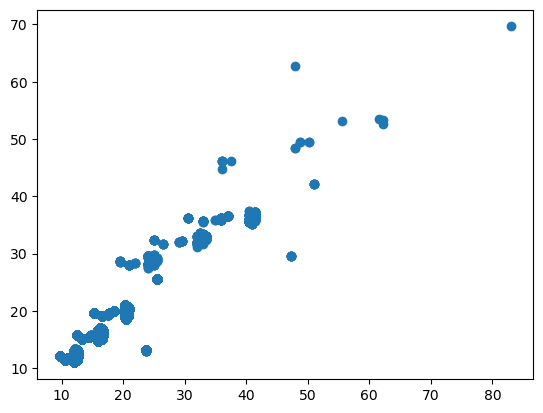

In [58]:
# plot b/w actual and the predicted value of the y varibale(mpg)
plt.scatter(y_train,predicted_train);

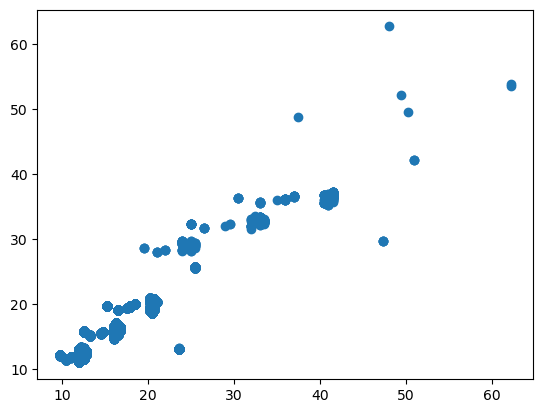

In [59]:
plt.scatter(y_test,predicted_test);

## Decision Tree

In [60]:
from sklearn.tree import DecisionTreeRegressor

In [61]:
dt_model= DecisionTreeRegressor(max_depth=3)

In [62]:
dt_model.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=3)

In [63]:
dt_model.score(x_train,y_train)

0.8309328009409993

In [64]:
dt_model.score(x_test,y_test)

0.8221610581366108

In [65]:
## RMSE on train data
predicted_train=dt_model.predict(x_train)
mean_squared_error(y_train,predicted_train,squared=False)

1.8381721794880144

In [66]:
## RMSE on test data
predicted_test=dt_model.predict(x_test)
mean_squared_error(y_test,predicted_test,squared=False)

1.8380759873140238

In [67]:
mean_absolute_percentage_error(y_train,predicted_train)

0.06650775143983478

## Random Forest

In [68]:
from sklearn.ensemble import RandomForestRegressor

In [69]:
rf_model=RandomForestRegressor(n_estimators=100,
                              random_state=4,
                              max_samples=0.7,
                              max_features=0.75,
                              max_depth=35)

In [70]:
rf_model.fit(x_train,y_train)

RandomForestRegressor(max_depth=35, max_features=0.75, max_samples=0.7,
                      random_state=4)

In [71]:
rf_model.score(x_train,y_train)

0.9993772675080456

In [72]:
rf_model.score(x_test,y_test)

0.9987592544820099

In [73]:
## RMSE on train data
predicted_train=rf_model.predict(x_train)
mean_squared_error(y_train,predicted_train,squared=False)

0.11155968339458337

In [74]:
## RMSE on test data
predicted_test=rf_model.predict(x_test)
mean_squared_error(y_test,predicted_test,squared=False)

0.15352934112735955

In [75]:
mean_absolute_percentage_error(y_train,predicted_train)

9.644075949541285e-05

### By The all models we can gathered accuracy of R2 score, RMSE and MAE Score and we can make the dataframe to easily identify which module gives best accuracy.

In [76]:
Results = pd.DataFrame({'Model':['Linear Regression','Decision Tree','Random Forest'],'Train Score':[0.85,0.83,0.99],'Test Score':[0.84,0.82,0.99],'RMSE Score':[1.67,1.83,0.14],'MAE Score':[0.06,0.06,0.00]})
Results_show = Results.set_index('Model')
Results_show

,Train Score,Test Score,RMSE Score,MAE Score
Model,,,,
Linear Regression,0.85,0.84,1.67,0.06
Decision Tree,0.83,0.82,1.83,0.06
Random Forest,0.99,0.99,0.14,0.00


## Conclusion

Three different models were trained and evaluated on this data: Linear Regression, Decision Tree, and Random Forest. The Random Forest model outperformed the others with a high Train Score and Test Score, indicating strong predictive capabilities. Additionally, the RMSE and MAE scores for the Random Forest model are significantly lower than those of the other models, suggesting that its predictions are more accurate and closer to the actual sales values.

In conclusion, the Random Forest model's strong predictive performance offers valuable insights for optimizing various aspects of the pizzeria's operations. By utilizing the model's predictions and understanding the factors driving sales, the pizzeria can enhance inventory management, marketing strategies, menu offerings, and overall customer satisfaction, ultimately leading to increased business revenue.

## Business Perspectives and Insights:

Optimized Inventory and Production Planning: The accurate sales predictions from the Random Forest model can be used for efficient inventory management and production planning. By understanding which pizzas are likely to sell more, the pizzeria can ensure that they have the right ingredients on hand and avoid excess waste.

Tailored Marketing Strategies: With insights into which pizzas are popular and which attributes contribute to higher sales, the pizzeria can tailor their marketing strategies. Promotions, advertisements, and specials can be designed around the most popular pizza categories and attributes.

Menu Optimization: Understanding the impact of different ingredients and pizza attributes on sales allows for menu optimization. The pizzeria can focus on enhancing or promoting the pizzas that customers are more likely to order, potentially boosting revenue.

Customer Satisfaction and Loyalty: By analyzing the data, the pizzeria can identify customer preferences and patterns. This can lead to the creation of customer-favorite combinations or personalized options that resonate with their audience, enhancing customer satisfaction and loyalty.

Demand Forecasting: The model's predictive power can assist in forecasting future demand, helping the pizzeria make informed decisions about staffing, supply orders, and overall business strategies.

Sales Improvement: Based on the Random Forest model's strong performance, it's evident that attributes such as pizza size, category, and ingredients play a significant role in sales. By focusing on these attributes, the pizzeria can experiment with new combinations and offerings that align with customer preferences.

Special Promotions: The insights from the model can guide the creation of special promotions centered around high-performing pizza categories or attributes. Limited-time offers or discounts on popular pizzas can attract more customers and increase sales.

Customer Segmentation: The pizzeria can segment their customer base based on order patterns and preferences. This segmentation can inform targeted marketing efforts and customization options for different customer groups.